In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("who_suicide_statistics.csv")

In [3]:
df

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0
...,...,...,...,...,...,...
43771,Zimbabwe,1990,male,25-34 years,150.0,NaN
43772,Zimbabwe,1990,male,35-54 years,132.0,NaN
43773,Zimbabwe,1990,male,5-14 years,6.0,NaN
43774,Zimbabwe,1990,male,55-74 years,74.0,NaN


In [4]:
df.isnull().sum()

country           0
year              0
sex               0
age               0
suicides_no    2256
population     5460
dtype: int64

In [5]:
df.dropna(inplace=True,axis=0)

In [6]:
df.isnull().sum()

country        0
year           0
sex            0
age            0
suicides_no    0
population     0
dtype: int64

In [7]:
df.info

<bound method DataFrame.info of                     country  year     sex          age  suicides_no  \
24                  Albania  1987  female  15-24 years         14.0   
25                  Albania  1987  female  25-34 years          4.0   
26                  Albania  1987  female  35-54 years          6.0   
27                  Albania  1987  female   5-14 years          0.0   
28                  Albania  1987  female  55-74 years          0.0   
...                     ...   ...     ...          ...          ...   
43759  Virgin Islands (USA)  2015    male  25-34 years          2.0   
43760  Virgin Islands (USA)  2015    male  35-54 years          1.0   
43761  Virgin Islands (USA)  2015    male   5-14 years          0.0   
43762  Virgin Islands (USA)  2015    male  55-74 years          0.0   
43763  Virgin Islands (USA)  2015    male    75+ years          0.0   

       population  
24       289700.0  
25       257200.0  
26       278800.0  
27       311000.0  
28       144600

Text(0.5, 1.0, 'Number of suicides among different age groups')

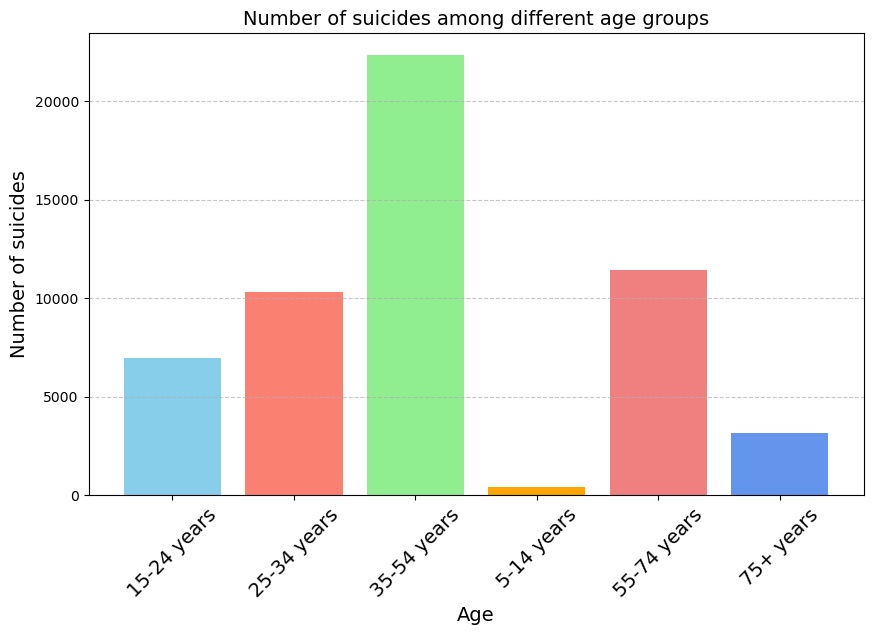

In [40]:
plt.figure(figsize=(10, 6))

colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral', 'cornflowerblue']

plt.bar(df['age'],df['suicides_no'],color=colors)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45,size=14)
plt.xlabel('Age',size=14)
plt.ylabel('Number of suicides',size=14)
plt.title("Number of suicides among different age groups",size=14)

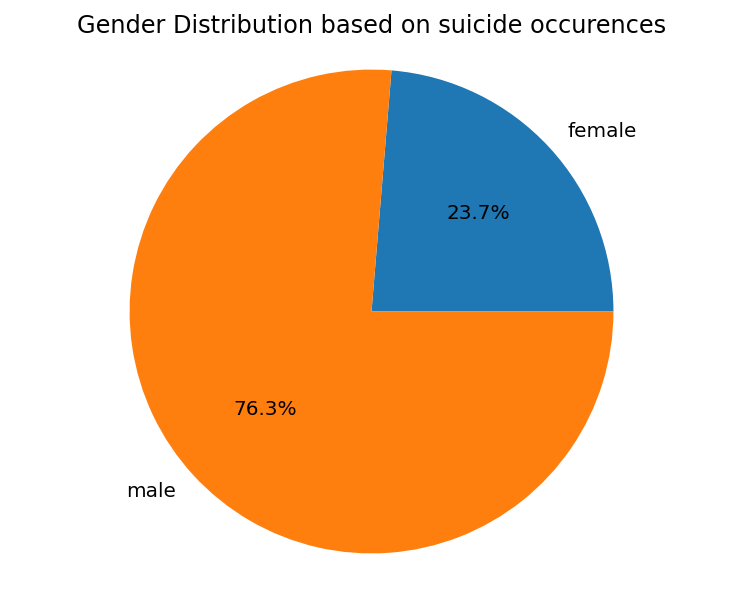

In [41]:
df_gender=df[["sex","suicides_no","population"]]
df_gender=df_gender.groupby(["sex"])[["suicides_no","population"]].sum()
df_gender.reset_index(inplace=True)

plt.figure(dpi=144)
plt.pie(df_gender["suicides_no"], labels=df_gender["sex"], autopct="%1.1f%%")
plt.title("Gender Distribution based on suicide occurences")
plt.axis('Equal')
plt.show()

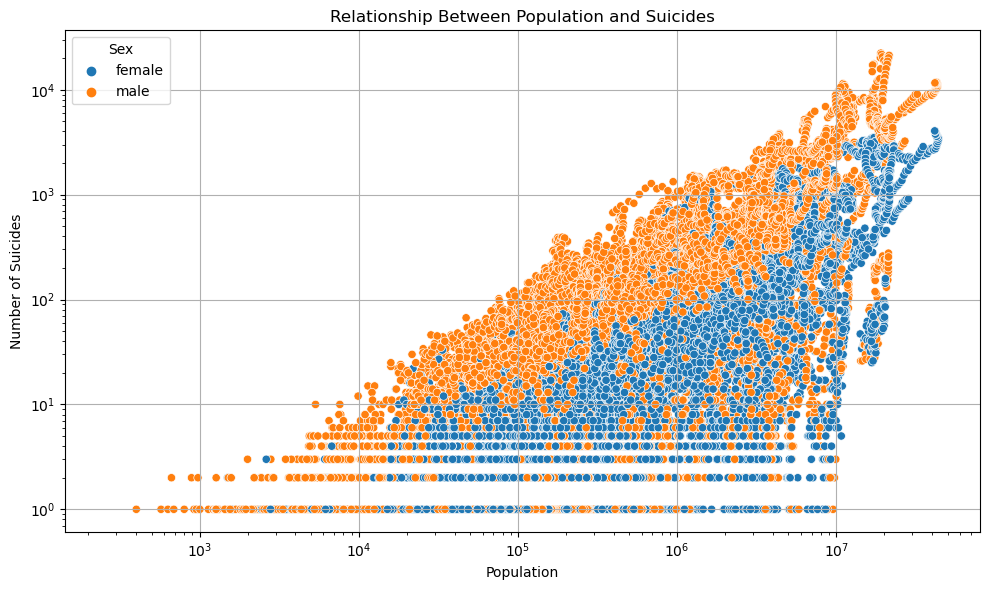

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='population', y='suicides_no', hue='sex')
plt.title('Relationship Between Population and Suicides')
plt.xlabel('Population')
plt.ylabel('Number of Suicides')
plt.xscale('log')
plt.yscale('log')
plt.legend(title='Sex')
plt.grid(True)
plt.tight_layout()
plt.show()

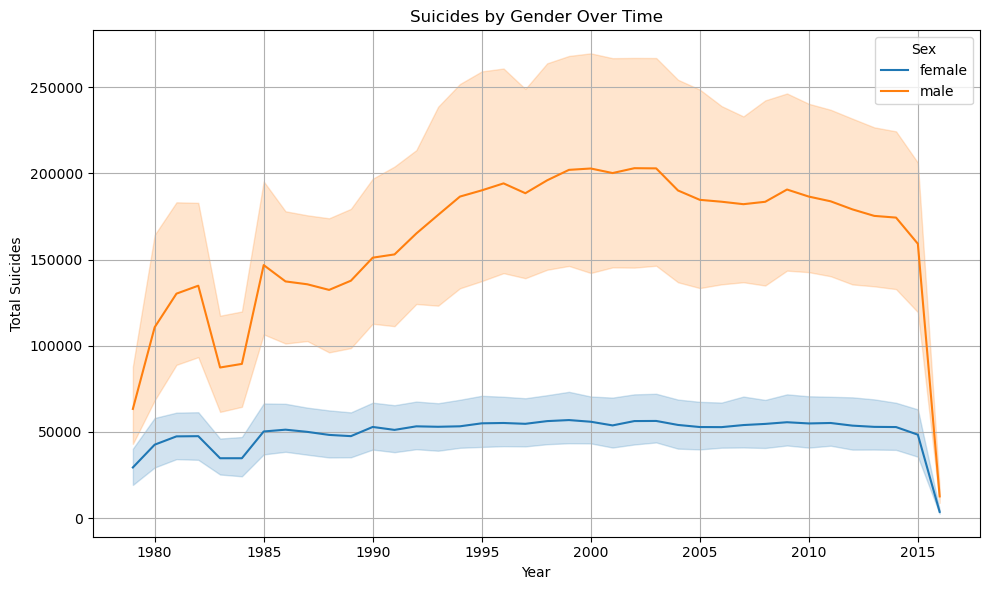

In [43]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='year', y='suicides_no', hue='sex', estimator='sum')
plt.title('Suicides by Gender Over Time')
plt.xlabel('Year')
plt.ylabel('Total Suicides')
plt.legend(title='Sex')
plt.grid(True)
plt.tight_layout()
plt.show()

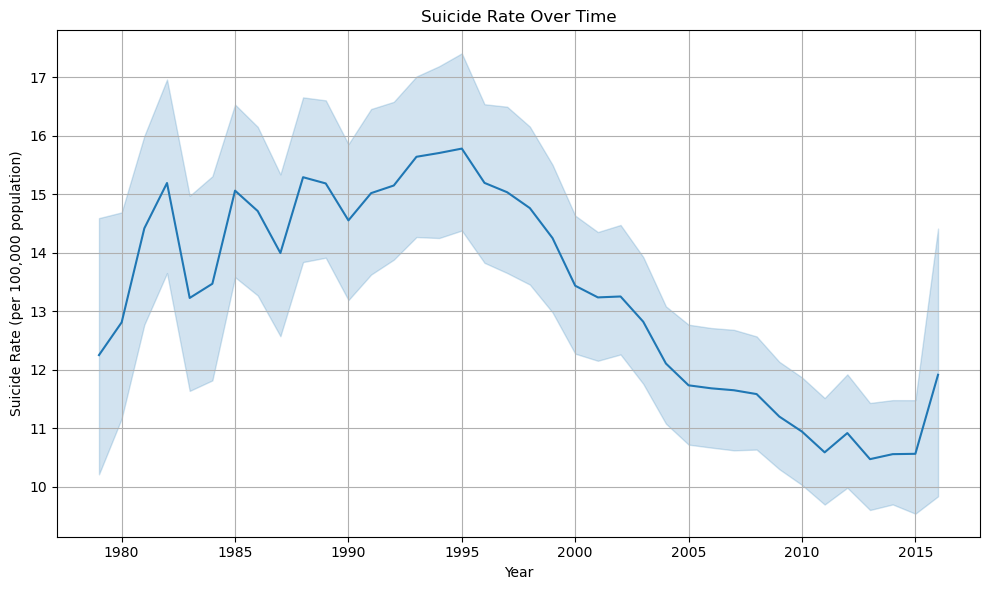

In [44]:
df['suicide_rate'] = (df['suicides_no'] / df['population']) * 100000

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='year', y='suicide_rate', estimator='mean')
plt.title('Suicide Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Suicide Rate (per 100,000 population)')
plt.grid(True)
plt.tight_layout()
plt.show()

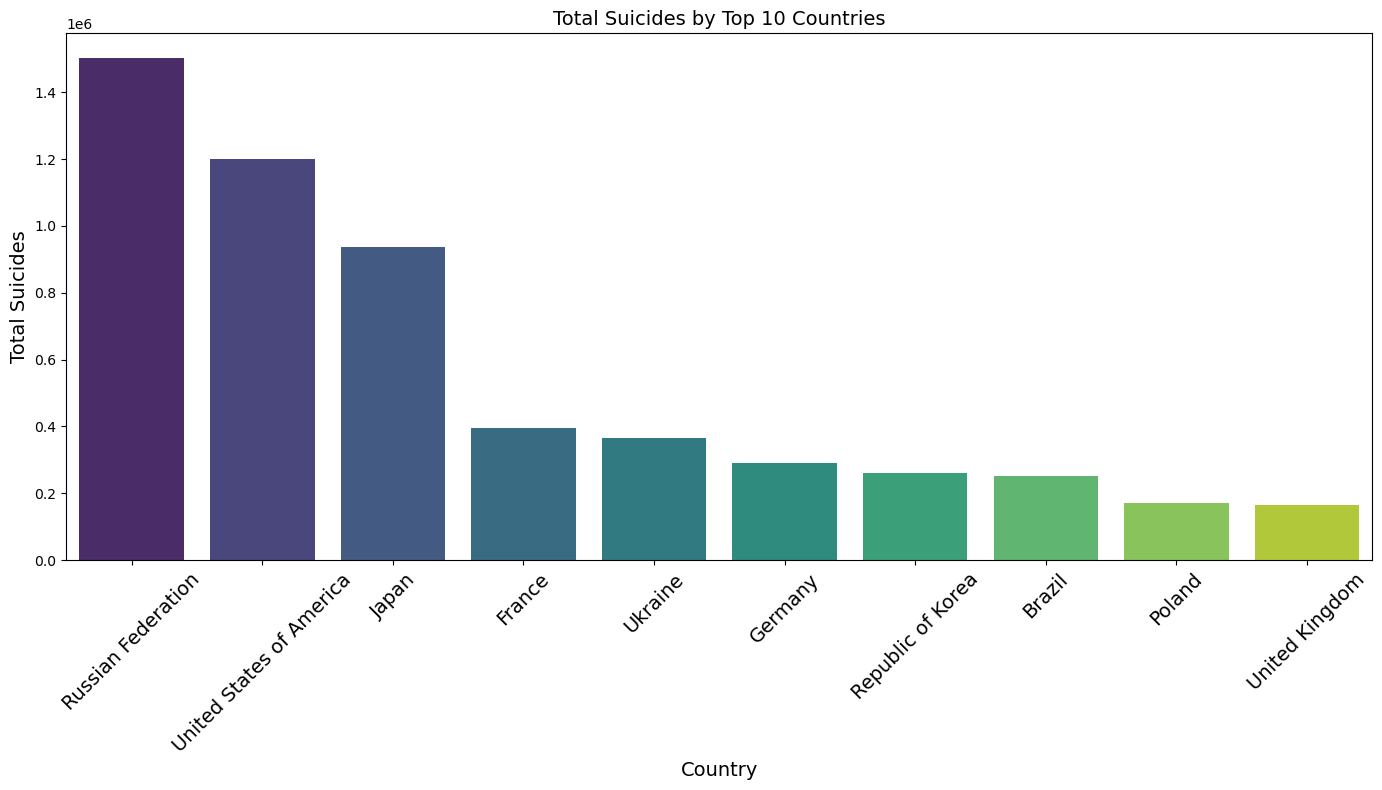

In [45]:
plt.figure(figsize=(14, 8))
sns.barplot(data=df.groupby('country')['suicides_no'].sum().sort_values(ascending=False).reset_index().head(10),
            x='country', y='suicides_no', palette='viridis')
plt.title('Total Suicides by Top 10 Countries',size=14)
plt.xlabel('Country',size=14)
plt.ylabel('Total Suicides',size=14)
plt.xticks(rotation=45,size=14)
plt.tight_layout()
plt.show()

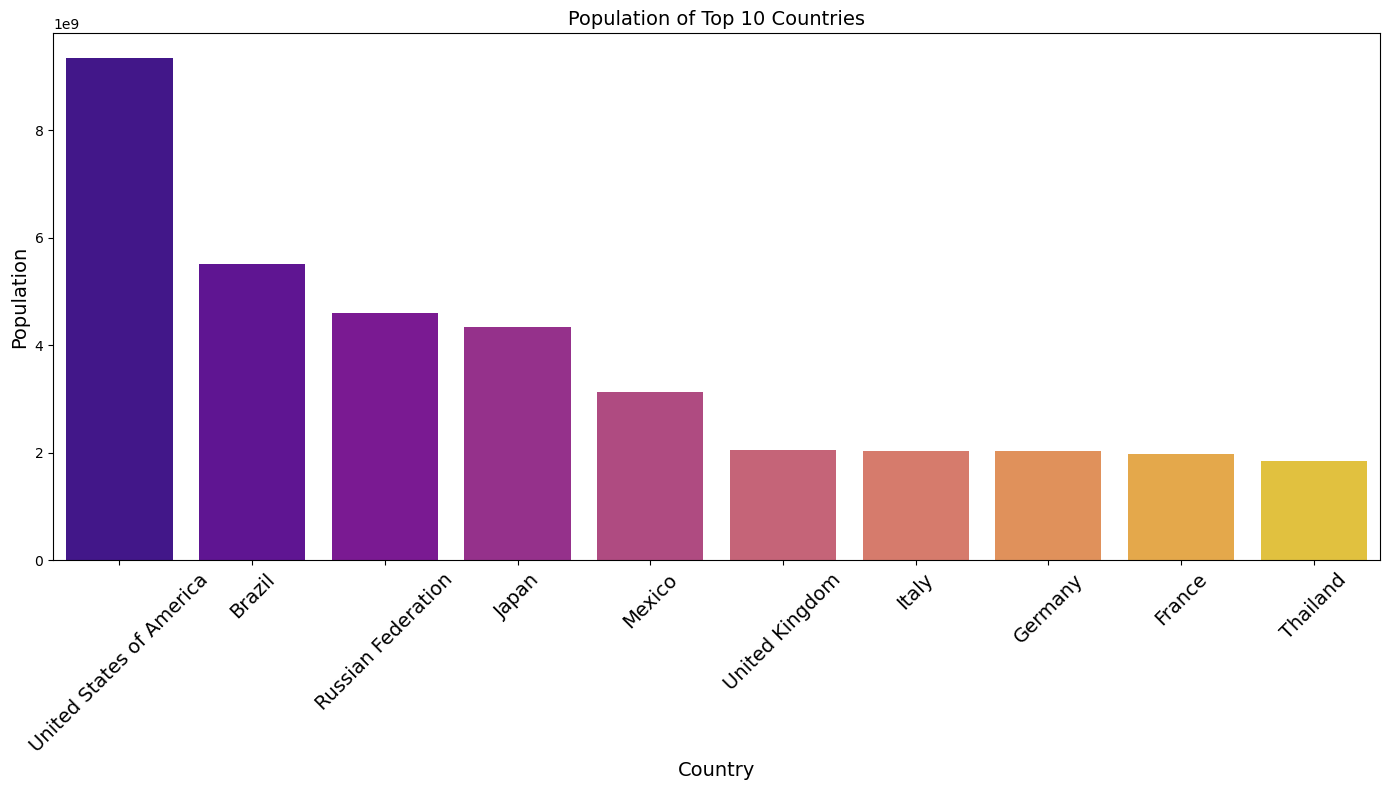

In [46]:
plt.figure(figsize=(14, 8))
sns.barplot(data=df.groupby('country')['population'].sum().sort_values(ascending=False).reset_index().head(10),
            x='country', y='population', palette="plasma")
plt.title('Population of Top 10 Countries',size=14)
plt.xlabel('Country',size=14)
plt.ylabel('Population',size=14)
plt.xticks(rotation=45,size=14)
plt.tight_layout()
plt.show()

In [48]:
country_avg_suicides = df.groupby('country')['suicides_no'].mean().reset_index()

# Rename columns for clarity
country_avg_suicides.columns = ['Country', 'Average Suicides per Year']

# Sort the table by average suicides per year in descending order
country_avg_suicides = country_avg_suicides.sort_values(by='Average Suicides per Year', ascending=False)

# Display the table
country_avg_suicides

,Country,Average Suicides per Year
88,Russian Federation,3678.901961
113,United States of America,2705.858108
54,Japan,2111.743243
110,Ukraine,950.963542
40,Germany,933.532051
...,...,...
93,Sao Tome and Principe,0.111111
30,Dominica,0.055556
1,Antigua and Barbuda,0.032738
89,Saint Kitts and Nevis,0.000000


In [16]:
total_suicides = df['suicides_no'].sum()

# Calculate average number of suicides per year
total_years = df['year'].nunique()
average_suicides_per_year = total_suicides / total_years

# Calculate total population covered by the dataset
total_population = df['population'].sum()

# DataFrame for the summary table
summary_data = {
    'Statistic': ['Total Suicides', 'Average Suicides per Year', 'Total Population'],
    'Value': [total_suicides, average_suicides_per_year, total_population]
}

summary_table = pd.DataFrame(summary_data)


summary_table['Value'] = summary_table['Value'].apply(lambda x: '{:,.0f}'.format(x))

# Display the summary table
summary_table

,Statistic,Value
0,Total Suicides,"7,998,467"
1,Average Suicides per Year,"210,486"
2,Total Population,"61,301,845,866"


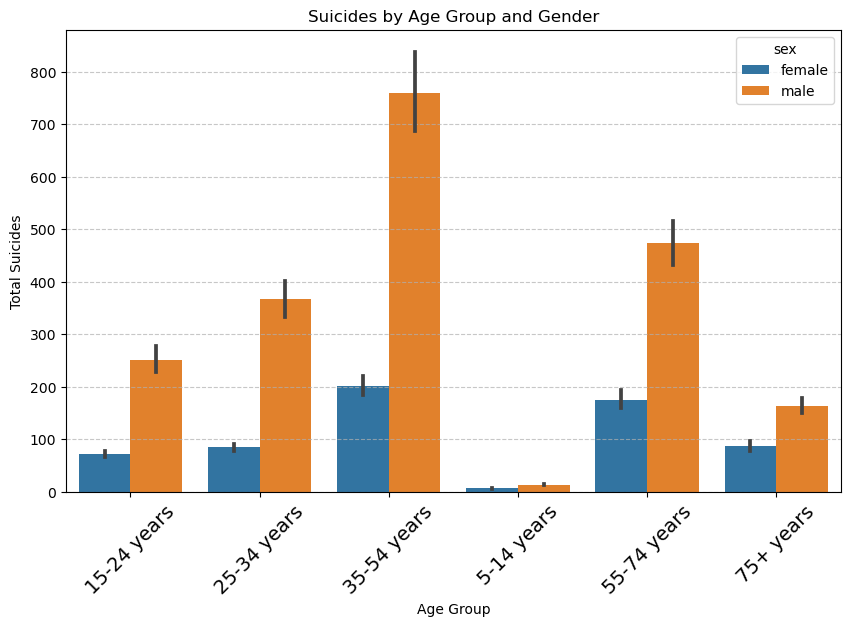

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='age', y='suicides_no', hue='sex')
plt.title('Suicides by Age Group and Gender',size=14)
plt.xlabel('Age Group',size=14)
plt.ylabel('Total Suicides',size=14)
plt.xticks(rotation=45,size=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [49]:
df.describe()

,year,suicides_no,population,suicide_rate
count,36060.000000,36060.000000,3.606000e+04,36060.000000
mean,1998.935441,221.809956,1.699996e+06,13.185094
std,10.163883,855.449442,3.697811e+06,19.902566
min,1979.000000,0.000000,2.590000e+02,0.000000
25%,1991.000000,2.000000,8.056600e+04,0.781784
50%,2000.000000,21.000000,3.757650e+05,5.975607
75%,2008.000000,116.000000,1.344900e+06,17.010064
max,2016.000000,22338.000000,4.380521e+07,300.751880
